# Problem 4: 
## [ATM350 Homework 3](https://docs.google.com/document/d/1LakRQQE3ORtRqUrKRTJa7IZy93uLa2qe37AUMpY0v68/edit), Spring 2023
```
The website, xmACIS2, is a great archive for text-based weather data, climatology, records, etc.  For this problem, you will be retrieving data relevant to your final project case study.
First, create a problem4 directory and cd into it.
Then, complete the following tasks:
```

### Part a:
```
Copy the notebook, /spare11/atm350/common/hwdata/hw3/Xmacis.ipynb into this directory.
```

### Part b:
```
Modify the notebook as guided by the four Tasks. Choose a site and a time period (at least one week, no greater than one month) to retrieve data relevant for your case study.
```

### Part c:
```
Run the notebook to its completion.
```

### Part d:
```
Use Pandas and Matplotlib to create the following time-series plots:
    1. Max / min temps (deg. C)
    2. Daily precip (units of mm) (or, if relevant for your case, daily snowfall)
```

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvFile = 'climo_alb_930310_930316.csv'

#### Read the file into a Pandas `Dataframe`

In [12]:
df = pd.read_csv(csvFile, dtype='string')

Examine the `Dataframe`

In [13]:
df

DATE MAX MIN   AVG    DEP HDD CDD   PCP   SNW DPT
0  1993-03-10  38  25  31.5   -2.1  33   0  0.16   3.1   2
1  1993-03-11  33  25  29.0   -4.9  36   0  0.08   1.4   6
2  1993-03-12  26  10  18.0  -16.2  47   0     T   0.2   5
3  1993-03-13  21  16  18.5  -16.0  46   0  1.59  22.0   M
4  1993-03-14  20  11  15.5  -19.4  49   0  0.24   4.6  28
5  1993-03-15  27   1  14.0  -21.2  51   0  0.00   0.0  27
6  1993-03-16  43  17  30.0   -5.6  35   0  0.00   0.0  27

#### Set objects for the max/min temperatures, and express as floating point values.

In [14]:
maxT=df['MAX'].astype("float32")
minT=df['MIN'].astype("float32")

Convert to Celsius

In [15]:
maxT = (maxT - 32) / 1.8
minT = (minT - 32) / 1.8

#### Set object for the date, and express as `datetime` values.

In [16]:
date = df['DATE']
date = pd.to_datetime(date, format="%Y-%m-%d")

#### Read in the daily precip (or, if relevant, snowfall) total; handle Trace values; express as floating point values; convert to mm.

In [17]:
df.loc[df['SNW'] =='T', ['SNW']] = '0.0'
df['SNW'] = df['SNW'].astype("float32") * 25.4
snow = df['SNW']

#### Create a figure of daily max/min temps for the period of interest

In [11]:
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator
import seaborn as sns

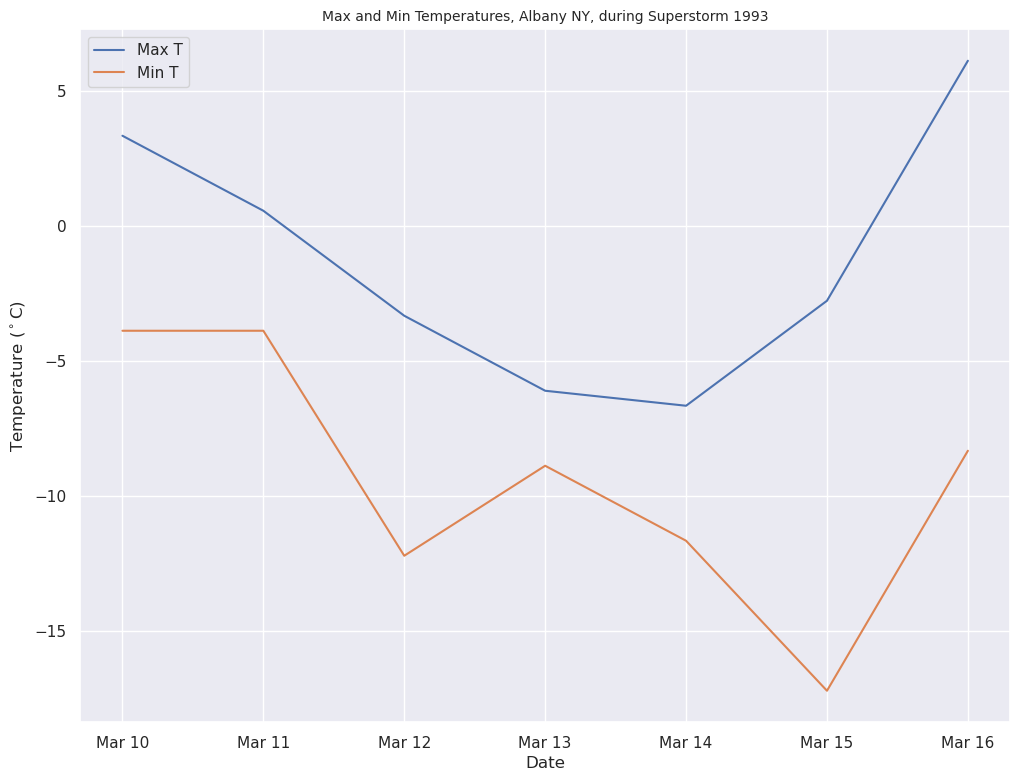

In [19]:
sns.set()
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot() # Default is one axes per figure

ax.plot(date, maxT, label='Max T')
ax.plot(date, minT, label='Min T')

ax.xaxis.set_major_locator(DayLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.legend(loc='best')
ax.set_title('Max and Min Temperatures, Albany NY, during Superstorm 1993',fontsize=10);

#### Create a figure of daily precip (or snowfall) for the period of interest

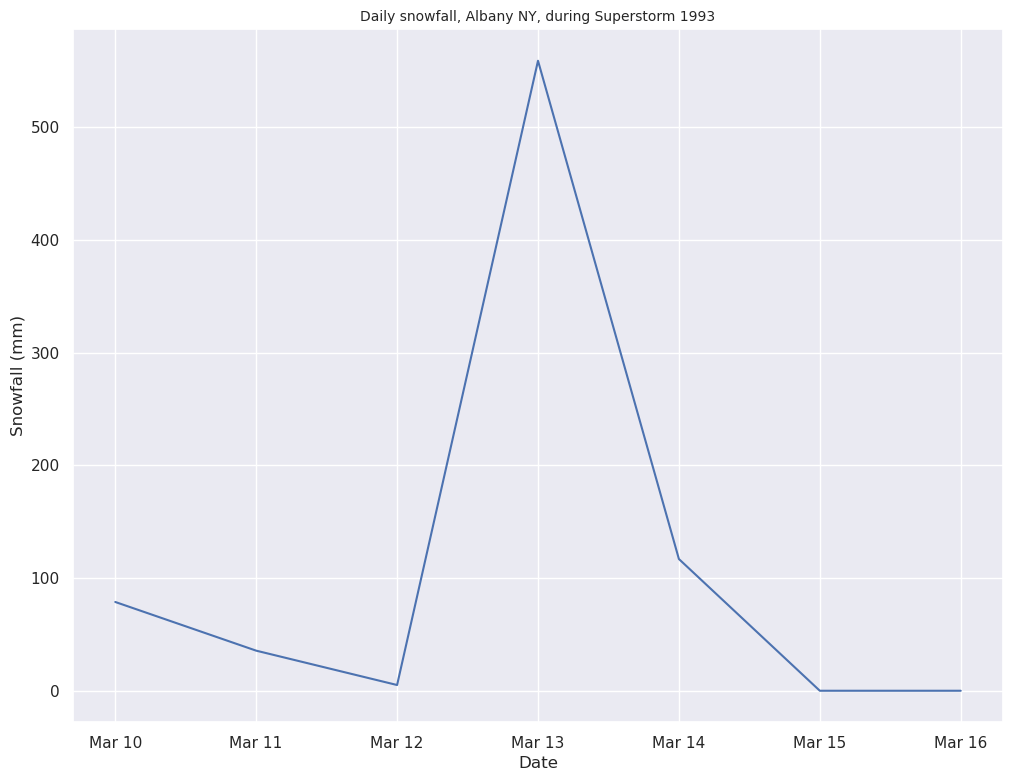

In [21]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot() # Default is one axes per figure

ax.plot(date, snow)

ax.xaxis.set_major_locator(DayLocator(interval=1))
dateFmt = DateFormatter('%b %d')
ax.xaxis.set_major_formatter(dateFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Snowfall (mm)')
ax.set_title('Daily snowfall, Albany NY, during Superstorm 1993',fontsize=10);